In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\asgei\Documents\Lokaverkefni\Travelers_to_Iceland_2002_2022.xlsx", engine='openpyxl')

In [4]:
#The first dataset I load, here called df, contains the total number of visitors that came to Iceland from 2003 until 2022. 
#Let's take a look at the columns and the first few rows. 

In [5]:
print(df.head())

   Year  Visitors
0  2002    248580
1  2003    308768
2  2004    348533
3  2005    361187
4  2006    398901


In [6]:
#Line graphs are a great way to show change over time, so I'll plot one to see how the total number of visitors has evolved 
#over this period. 

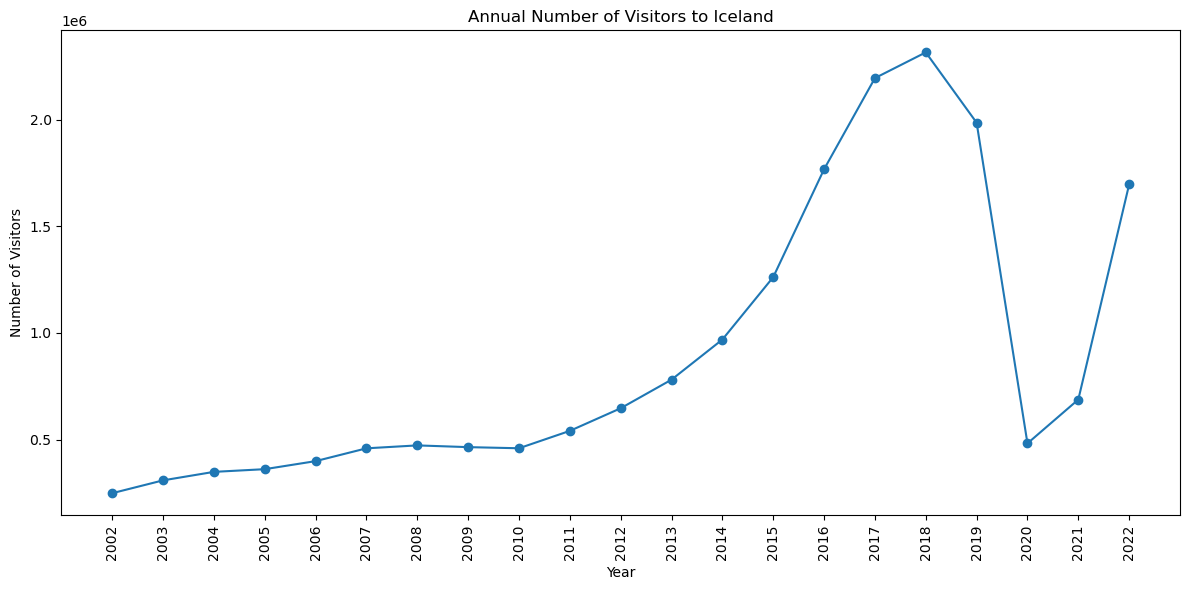

In [7]:
plt.figure(figsize=(12, 6)) 

plt.plot(df['Year'], df['Visitors'], marker='o', linestyle='-')
plt.xticks(df['Year'], rotation='vertical')

plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Annual Number of Visitors to Iceland')

plt.tight_layout()
plt.savefig('Annual_number_of_visitors_to_Iceland.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [8]:
df2 = pd.read_excel(r"C:\Users\asgei\Documents\Lokaverkefni\Travelers_to_Iceland_by_month.xlsx", engine='openpyxl')

In [9]:
#The next dataset I'll look at, here called df2, contains the total number of visitors to Iceland from 2003 until 2022. 
#The difference between this and the first data frame is that the data is divided by month, giving us an overview of when 
#in the year travelers are visiting Iceland. 

In [10]:
print(df2.head())

        date  visitors_total
0 2003-01-01           12697
1 2003-02-01           12948
2 2003-03-01           18537
3 2003-04-01           20465
4 2003-05-01           20373


In [11]:
#When I worked in tourism in Iceland, we often discussed how travelers divided through the year and whether or not the season 
#was extending further into the fall (September and October). I will generate a heat map to get a better overview to see if 
#this is true. 

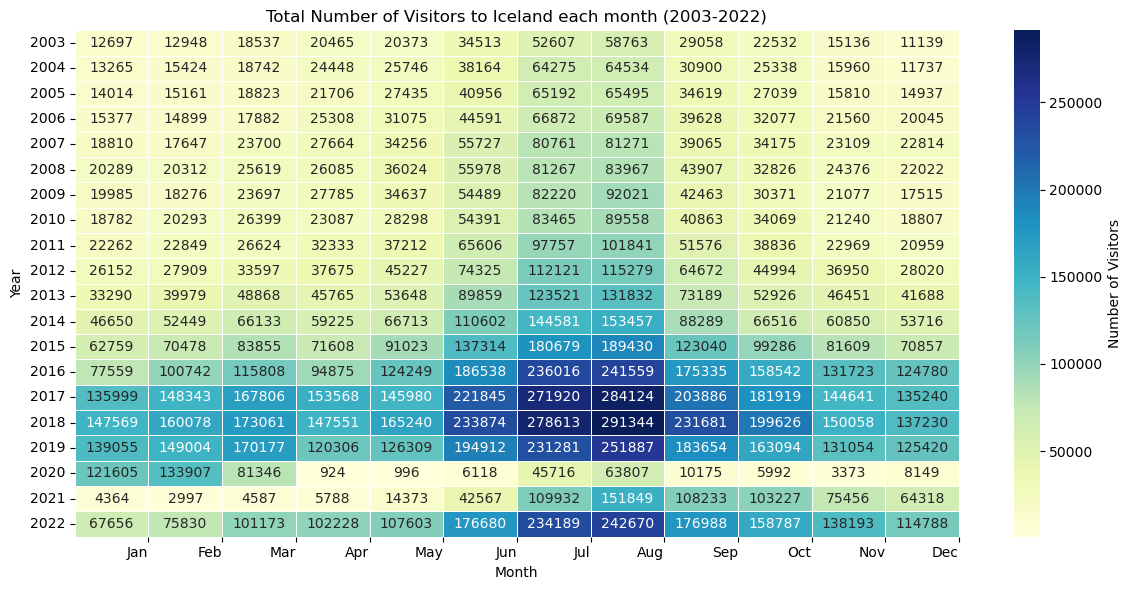

In [12]:
pivot_df = df2.pivot_table(index=df2['date'].dt.year, columns=df2['date'].dt.month, values='visitors_total')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6)) 
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, cbar_kws={'label': 'Number of Visitors'})

plt.xticks(ticks=range(1, 13), labels=month_names, ha='right')

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Total Number of Visitors to Iceland each month (2003-2022)')

plt.tight_layout()
plt.savefig('heatmap_2003_2022.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [13]:
df3 = pd.read_excel(r"C:\Users\asgei\Documents\Lokaverkefni\visitors_by_nationality.xlsx", engine='openpyxl')

In [14]:
print(df3.head())

   year nationality  visitors
0  2003         usa   45242.0
1  2003          uk   52973.0
2  2003     denmark   24326.0
3  2003    finnland    6970.0
4  2003      france   20345.0


In [15]:
#The following data frame we'll look at, here called df3, shows from which countries visitors are coming each year from 2003 
#to 2022. I am primarily interested in where visitors came from last year, 2022. To visualize it, I will generate a bar chart 
#and have it in ascending order. 

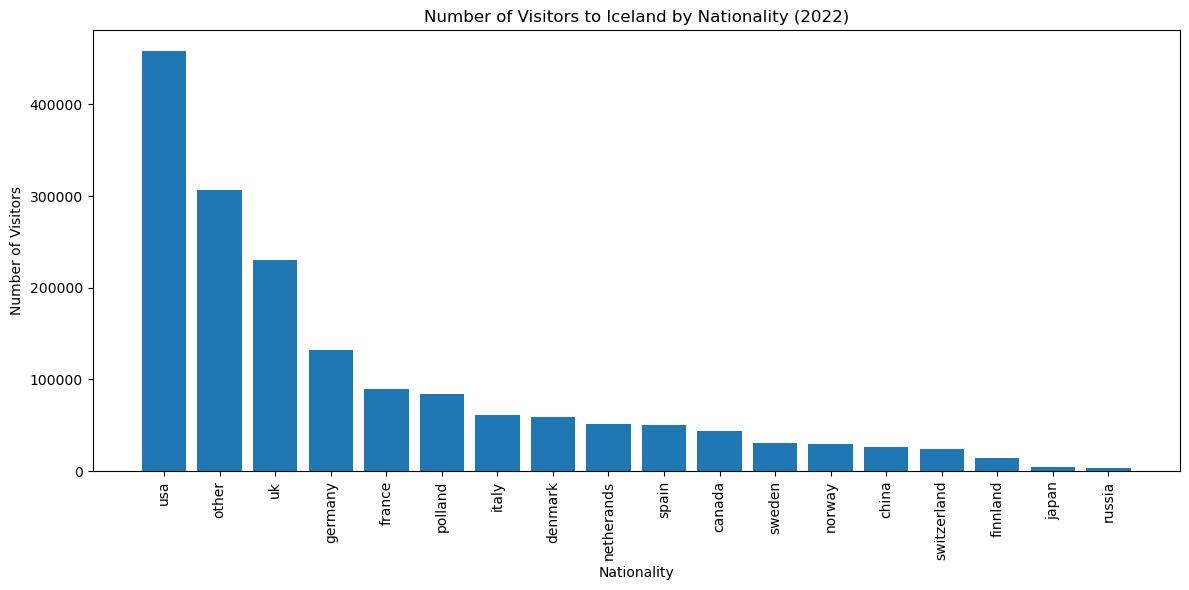

In [16]:
df_2022 = df3[df3['year'] == 2022]

df_sorted = df_2022.sort_values(by='visitors', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['nationality'], df_sorted['visitors'])

plt.xlabel('Nationality')
plt.ylabel('Number of Visitors')
plt.title('Number of Visitors to Iceland by Nationality (2022)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('Number_of_Visitors_to_Iceland_by_Nationality.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [17]:
df4 = pd.read_excel(r"C:\Users\asgei\Documents\Lokaverkefni\Visitors_month_nationality.xlsx", engine='openpyxl')
print(df4.head())

        date     usa      uk  denmark  finnland  france  netherands  italy  \
0 2003-01-01  2451.0  2927.0    763.0     194.0   412.0       294.0  222.0   
1 2003-02-01  1990.0  3605.0    917.0     290.0   631.0       458.0  108.0   
2 2003-03-01  2969.0  3812.0   1532.0     545.0  1072.0      1146.0  159.0   
3 2003-04-01  2838.0  5840.0   1664.0     702.0   880.0       480.0  196.0   
4 2003-05-01  3623.0  3960.0   1549.0     736.0   967.0       929.0  222.0   

   japan  canada  china  norway  polland  russia  spain  switzerland  sweden  \
0  385.0   125.0    NaN  1075.0      NaN     NaN  125.0        104.0   973.0   
1  238.0    93.0    NaN  1616.0      NaN     NaN   65.0         71.0  1217.0   
2  259.0   134.0    NaN  2064.0      NaN     NaN  105.0        126.0  2004.0   
3  146.0   185.0    NaN  1982.0      NaN     NaN  120.0         91.0  2227.0   
4  190.0   156.0    NaN  2031.0      NaN     NaN  303.0        142.0  2132.0   

   germany  other  
0    784.0   1863  
1    683.0

In [18]:
#The following data frame, here called df4, contains the visitors' nationalities and the month they visited (departed from). 
#One problem that I am facing is that each nationality has its column. In the spirit of tidy data, I will use the Pandas library
#to merge all nationalities into a single column and create a new column/variable for the number of visitors. This will make it 
#easier to work with the data. Then I'll print out the first few rows to see if I was successful. 

In [19]:
df_tidy = pd.melt(df4, id_vars=['date'], var_name='nationality', value_name='visitors')
print(df_tidy.head())

        date nationality  visitors
0 2003-01-01         usa    2451.0
1 2003-02-01         usa    1990.0
2 2003-03-01         usa    2969.0
3 2003-04-01         usa    2838.0
4 2003-05-01         usa    3623.0


In [20]:
#One question I always had working in tourism/marketing is what markets are strongest in what season. To see this, 
#I will create bar charts for different seasons. One for summer (June/July/August), one for autumn (September/October), 
#another for early winter (November/December(Christmas season)), one for late winter (January/February/March), and at last, 
#one for spring (April/May). We will only be looking at 2022.

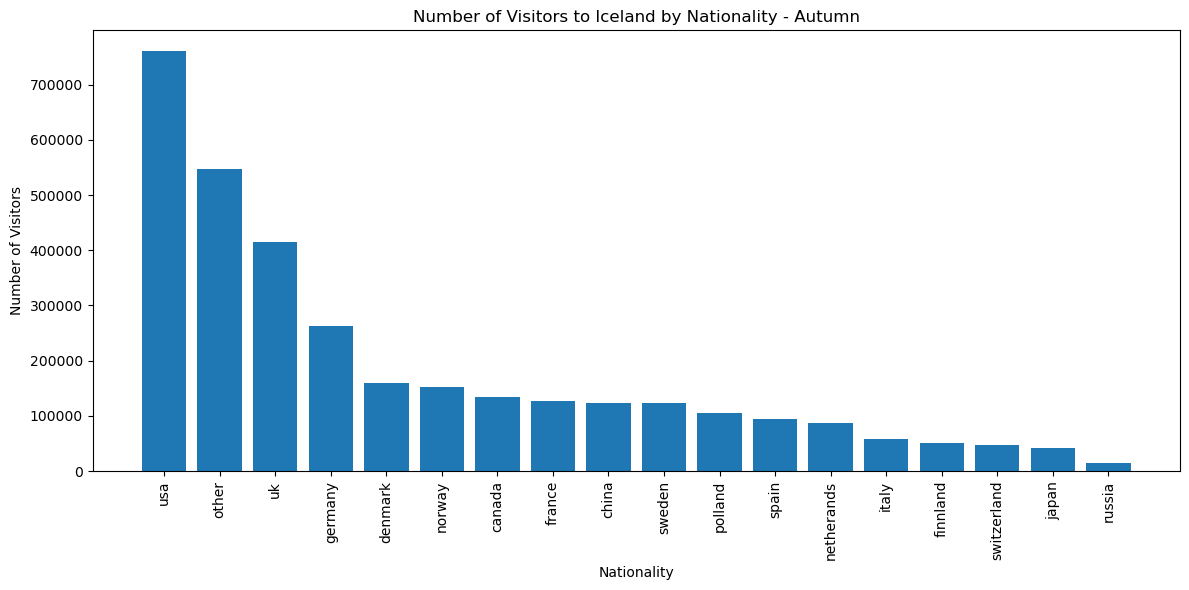

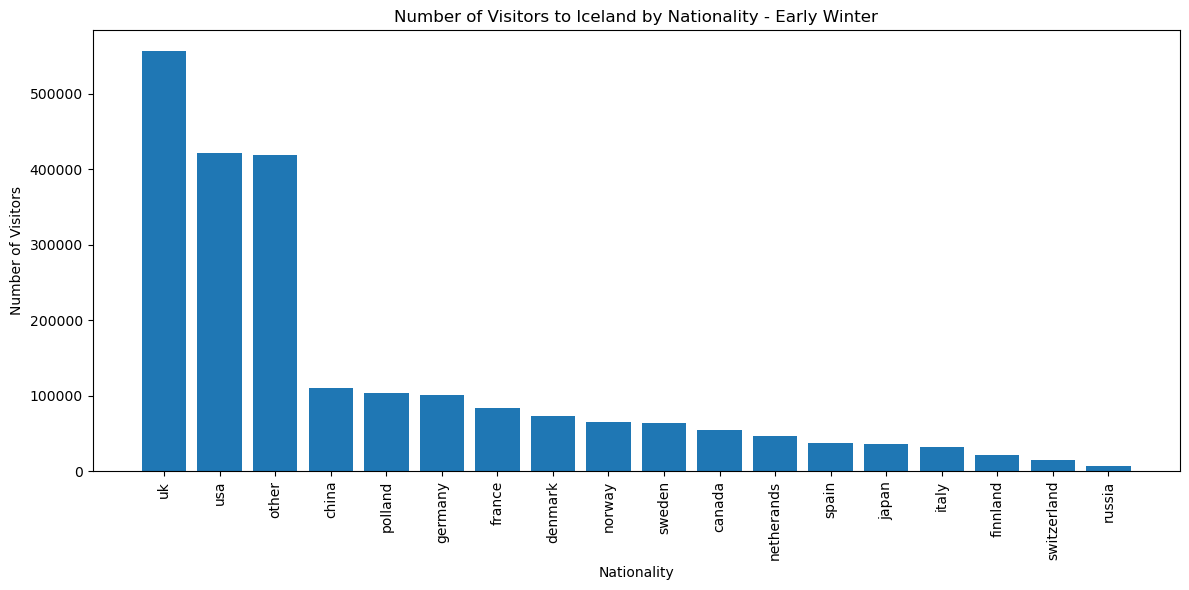

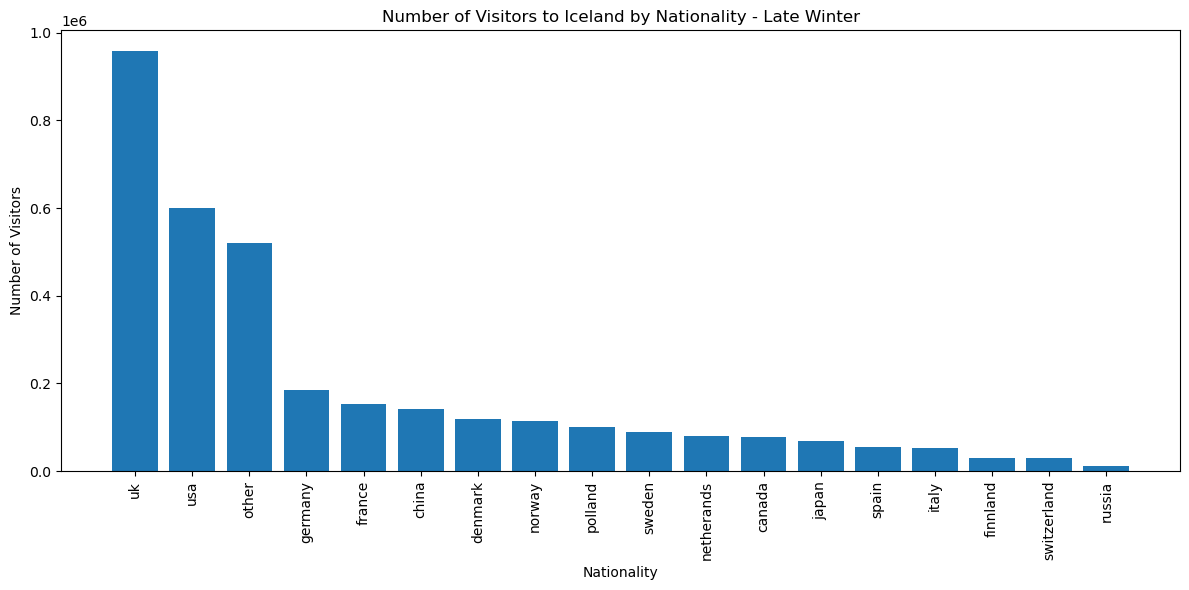

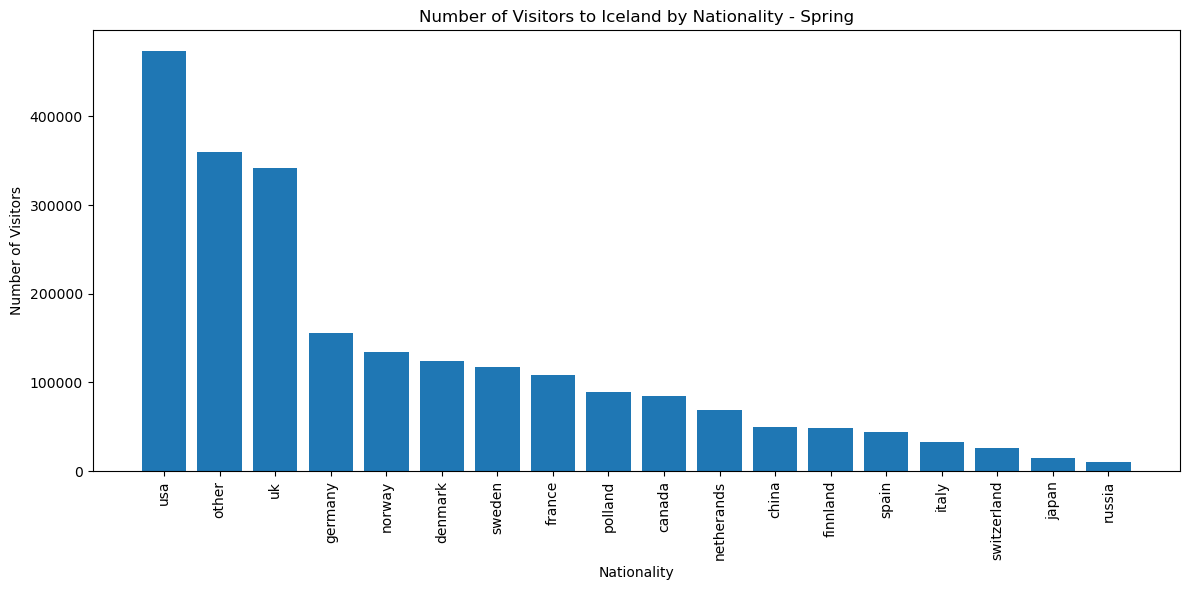

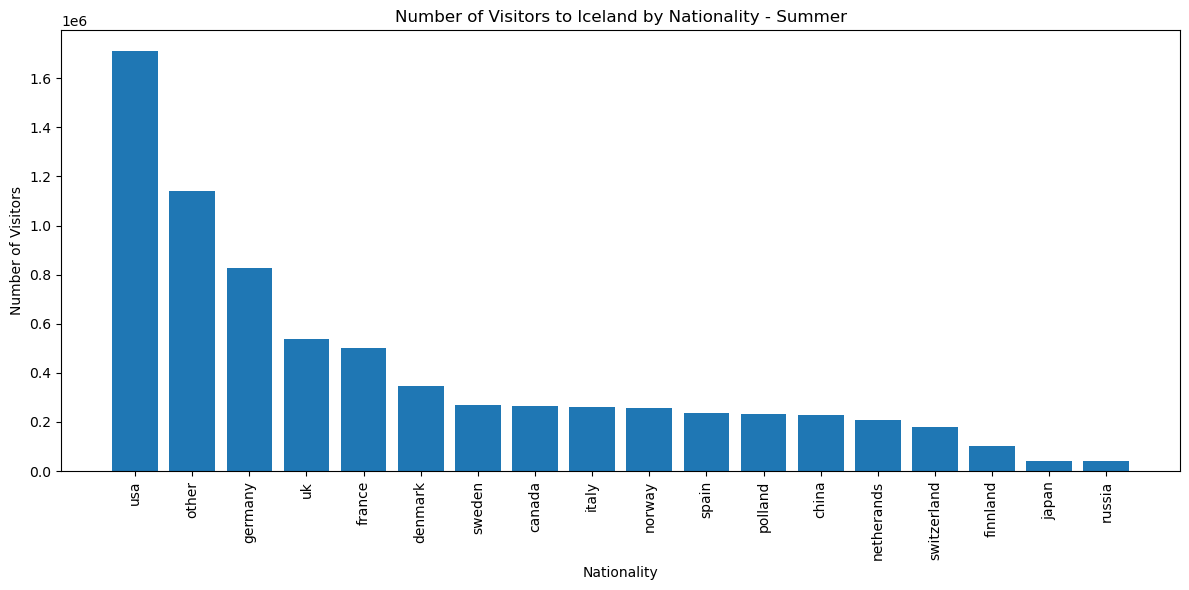

In [21]:
season_mapping = {
    1: 'Late Winter',
    2: 'Late Winter',
    3: 'Late Winter',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Early Winter',
    12: 'Early Winter'
}

df_tidy['season'] = df_tidy['date'].dt.month.map(season_mapping)

df_grouped = df_tidy.groupby(['nationality', 'season'])['visitors'].sum().reset_index()

seasons = df_grouped['season'].unique()
for season in seasons:
    plt.figure(figsize=(12, 6))
    df_season = df_grouped[df_grouped['season'] == season]
    
    
    df_season_sorted = df_season.sort_values(by='visitors', ascending=False)
    
    plt.bar(df_season_sorted['nationality'], df_season_sorted['visitors'])
    plt.xlabel('Nationality')
    plt.ylabel('Number of Visitors')
    plt.title(f'Number of Visitors to Iceland by Nationality - {season}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'chart_{season}.png')
    plt.show()